# Отток клиентов

### Загрузка и подготовка данных. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/Churn.csv')

In [2]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Необходимо:

Проверить пропуски и дубликаты

Проверить тип данных

Проверить кореляцию между столбцами

Удалить лишние столбцы, если необходимо

Категориальные признаки в численные

Предпочтительно именно в таком порядке, во избежании ошибок в работе с пропусками

In [3]:
data.duplicated().sum()

0

In [4]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [5]:
data['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

Почти 10% данных о том, сколько клиент обслуживается в банке отсутствуют. Слишком много, что б просто исключить эти данные! Заменим медианным значением.

In [6]:
tenu_median = data['Tenure'].median()
print(tenu_median)

5.0


In [7]:
data['Tenure'] = data['Tenure'].fillna(tenu_median)

In [8]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [10]:
data = data.drop('RowNumber', 1)
data = data.drop('Surname', 1) # Для решения текущей задачи нам не нужны эти данные
data = data.drop('Geography', 1)
data['Tenure'] = data['Tenure'].astype('int')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CustomerId         10000 non-null int64
CreditScore        10000 non-null int64
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


In [12]:
print(data['CreditScore'].corr(data['EstimatedSalary']))
print(data['CreditScore'].corr(data['Tenure']))
print(data['Balance'].corr(data['EstimatedSalary']))
print(data['NumOfProducts'].corr(data['HasCrCard']))

-0.0013842928679845155
-6.0319692877567824e-05
0.012797496340555709
0.0031831459930523782


In [13]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [14]:
data_ohe.head(10)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0
5,15574012,645,44,8,113755.78,2,1,0,149756.71,1,1
6,15592531,822,50,7,0.00,2,1,1,10062.80,0,1
7,15656148,376,29,4,115046.74,4,1,0,119346.88,1,0
8,15792365,501,44,4,142051.07,2,0,1,74940.50,0,1
9,15592389,684,27,2,134603.88,1,1,1,71725.73,0,1


In [15]:
data_ohe['Gender_Male'] = data_ohe['Gender_Male'].astype('int')

In [16]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CustomerId         10000 non-null int64
CreditScore        10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
Gender_Male        10000 non-null int64
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


### Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.

In [17]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)
data_train, data_ost = train_test_split(data_ohe, test_size=0.4, random_state=12345)
data_test, data_valid = train_test_split(data_ost, test_size=0.5, random_state=12345)

features_train = data_train.drop(['Exited'], axis=1)
target_train = data_train['Exited']

features_valid = data_valid.drop(['Exited'], axis=1)
target_valid = data_valid['Exited']

features_test = data_test.drop(['Exited'], axis=1)
target_test = data_test['Exited']

In [18]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.0


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.492091388400703


Интересно! Дисбаланс классов весьма значительный, без балансировки не пойдет...

### Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы

In [20]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.492091388400703


In [21]:

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.2)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)



print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.36308805790108567


In [22]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.43807919123841615


In [23]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.492091388400703


In [49]:
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')

    model.fit(features_train, target_train)

    predictions_valid = model.predict(features_valid)

    print("max_depth =", depth, ": ", end='')
    print(f1_score(target_valid, predictions_valid))

max_depth = 1 : 0.48514851485148514
max_depth = 2 : 0.5129682997118156
max_depth = 3 : 0.5129682997118156
max_depth = 4 : 0.5388349514563108
max_depth = 5 : 0.5835929387331257
max_depth = 6 : 0.5460992907801419
max_depth = 7 : 0.5447963800904977
max_depth = 8 : 0.5264100268576544
max_depth = 9 : 0.5217391304347826


In [50]:
for est in range(1, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced')

    model.fit(features_train, target_train)

    predictions_valid = model.predict(features_valid)

    print("max_depth =", depth, ": ", end='')
    print(f1_score(target_valid, predictions_valid))

max_depth = 9 : 0.45278450363196127
max_depth = 9 : 0.3694915254237288
max_depth = 9 : 0.4796747967479674
max_depth = 9 : 0.41883116883116883
max_depth = 9 : 0.4943181818181818
max_depth = 9 : 0.4451510333863275
max_depth = 9 : 0.48736998514115903
max_depth = 9 : 0.4451510333863275
max_depth = 9 : 0.47432024169184295


Останавливаемся на моделе "Дерево решений"

### Проведите финальное тестирование.

In [55]:
model = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print("F1:", f1_score(target_test, predicted_test))

F1: 0.5938494167550372


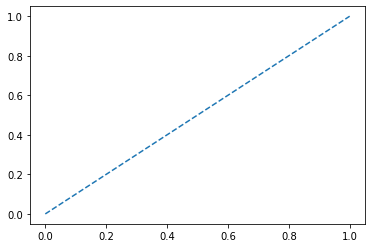

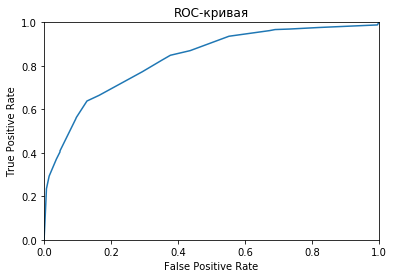

In [56]:
model = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()


In [81]:
from sklearn.metrics import roc_auc_score 
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.8404394663622744


Значение ожидаемо выше чем у среднего, а так же чем F1 метрика

0    0.7963
1    0.2037
Name: Exited, dtype: float64


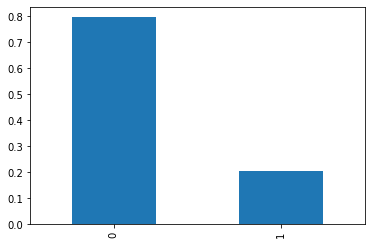

In [82]:
class_frequency = data_ohe['Exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

0    0.7212
1    0.2788
dtype: float64


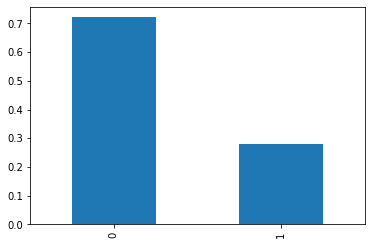

In [83]:
model = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced')
model.fit(features_train, target_train)

predicted_valid = pd.Series(model.predict(features_valid))

class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')


Модель адекватна